**Import necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load the dataset**

In [2]:
df = pd.read_excel("/content/retail_sales_data.xlsx")


**Explore the Dataset**

In [3]:
df.head()

,Order_ID,Date,Customer_Name,Product,Category,Quantity,Price,Total_Amount
0,1001,2023-01-05,Amit Sharma,Headphones,Electronics,2,1500,3000
1,1002,2023-01-12,Priya Mehta,Jeans,Clothing,1,2000,2000
2,1003,2023-02-08,Ravi Verma,Smartphone,Electronics,1,15000,15000
3,1004,2023-03-22,Anjali Singh,Microwave,Home Appliances,1,8000,8000
4,1005,2023-04-02,Vikram Desai,Sneakers,Footwear,2,3000,6000


In [4]:
df.shape

(15, 8)

In [5]:
df.isnull().sum()

,0
Order_ID,0
Date,0
Customer_Name,0
Product,0
Category,0
Quantity,0
Price,0
Total_Amount,0


**Convert 'Date' column to datetime format**

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

**Add Month and Year columns for time-based analysis**

In [7]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Year'] = df['Date'].dt.to_period('M')


**Monthly Sales Trend (Line chart)**

In [8]:
monthly_sales = df.groupby('Month_Year')['Total_Amount'].sum()


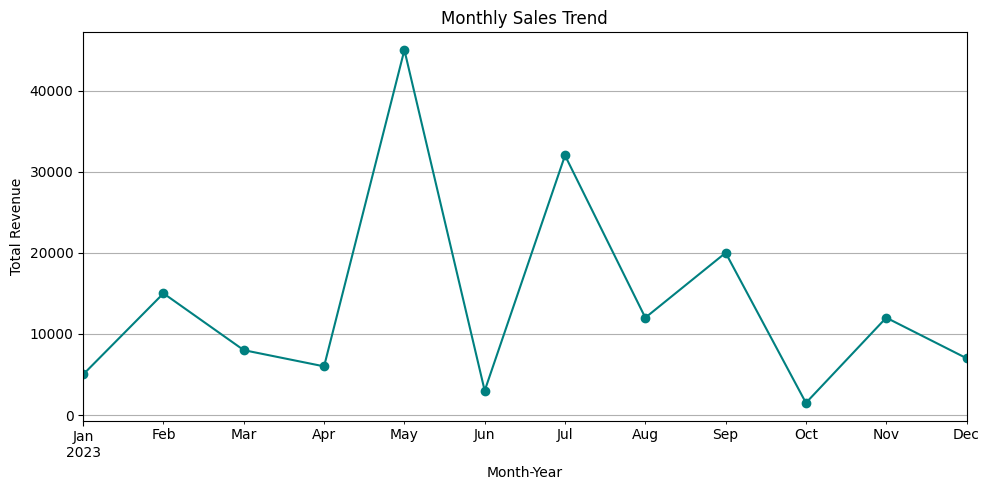

In [9]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


**Top 5 Best-Selling Products**

In [10]:
top_products = df.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False).head(5)


/tmp/ipython-input-11-4236624882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


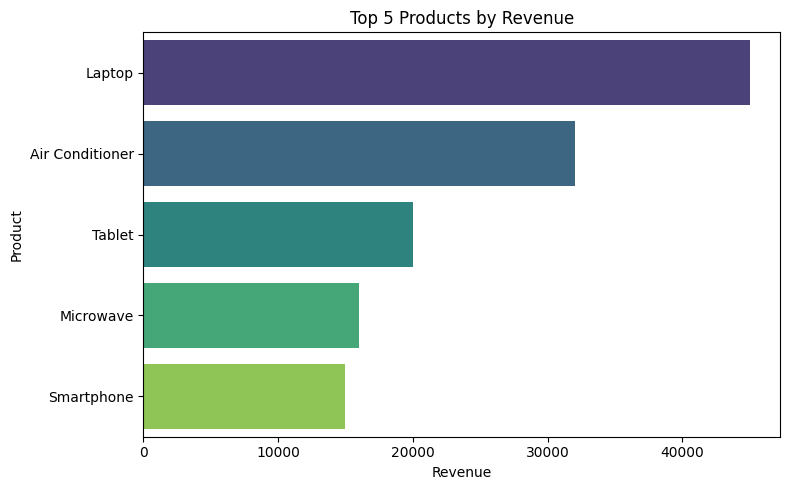

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


**Sales by Category (Pie Chart)**

In [12]:

category_sales = df.groupby('Category')['Total_Amount'].sum()


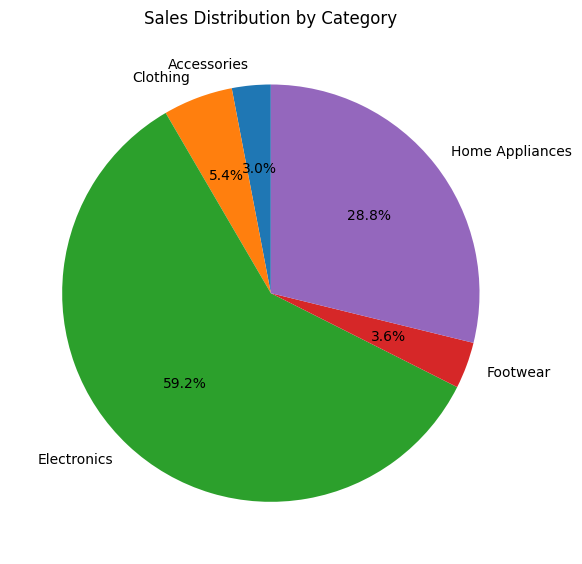

In [13]:
plt.figure(figsize=(6, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Top 5 Customers**

In [14]:
top_customers = df.groupby('Customer_Name')['Total_Amount'].sum().sort_values(ascending=False).head(5)


/tmp/ipython-input-15-63958775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='rocket')


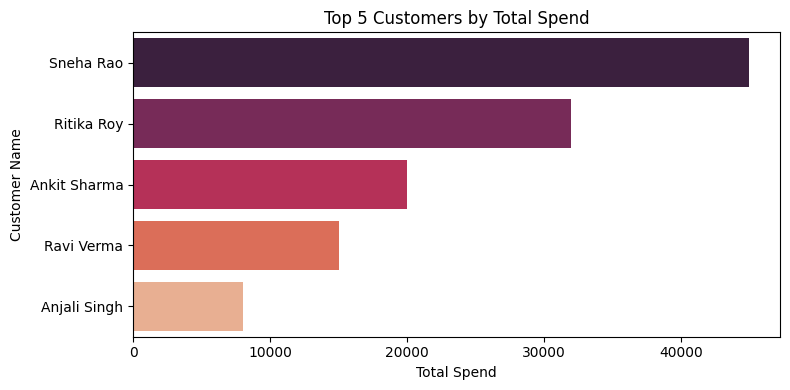

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='rocket')
plt.title('Top 5 Customers by Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()
